In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
import statsmodels.api as sm

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import missingno as msno
from collections import Counter

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [3]:
t2011 = pd.read_csv("F:\jupyter notebook\oakland-crime-statistics-2011-to-2016\\records-for-2011.csv")
t2012 = pd.read_csv("F:\jupyter notebook\oakland-crime-statistics-2011-to-2016\\records-for-2012.csv")
t2013 = pd.read_csv("F:\jupyter notebook\oakland-crime-statistics-2011-to-2016\\records-for-2013.csv")
t2014 = pd.read_csv("F:\jupyter notebook\oakland-crime-statistics-2011-to-2016\\records-for-2014.csv")
t2015 = pd.read_csv("F:\jupyter notebook\oakland-crime-statistics-2011-to-2016\\records-for-2015.csv")
t2016 = pd.read_csv("F:\jupyter notebook\oakland-crime-statistics-2011-to-2016\\records-for-2016.csv")
t2011.head()

,Agency,CreateTime,Location,AreaId,Beat,Priority,IncidentTypeId,IncidentTypeDescription,EventNumber,ClosedTime
0,OP,2011-01-01T00:00:00.000,ST&SAN PABLO AV,1.0,06X,1.0,PDOA,POSSIBLE DEAD PERSON,LOP110101000001,2011-01-01T00:28:17.000
1,OP,2011-01-01T00:01:11.000,ST&HANNAH ST,1.0,07X,1.0,415GS,415 GUNSHOTS,LOP110101000002,2011-01-01T01:12:56.000
2,OP,2011-01-01T00:01:25.000,ST&MARKET ST,1.0,10Y,2.0,415GS,415 GUNSHOTS,LOP110101000003,2011-01-01T00:07:20.000
3,OP,2011-01-01T00:01:35.000,PRENTISS ST,2.0,21Y,2.0,415GS,415 GUNSHOTS,LOP110101000005,2011-01-01T00:02:28.000
4,OP,2011-01-01T00:02:10.000,AV&FOOTHILL BLVD,2.0,20X,1.0,415GS,415 GUNSHOTS,LOP110101000004,2011-01-01T00:50:04.000


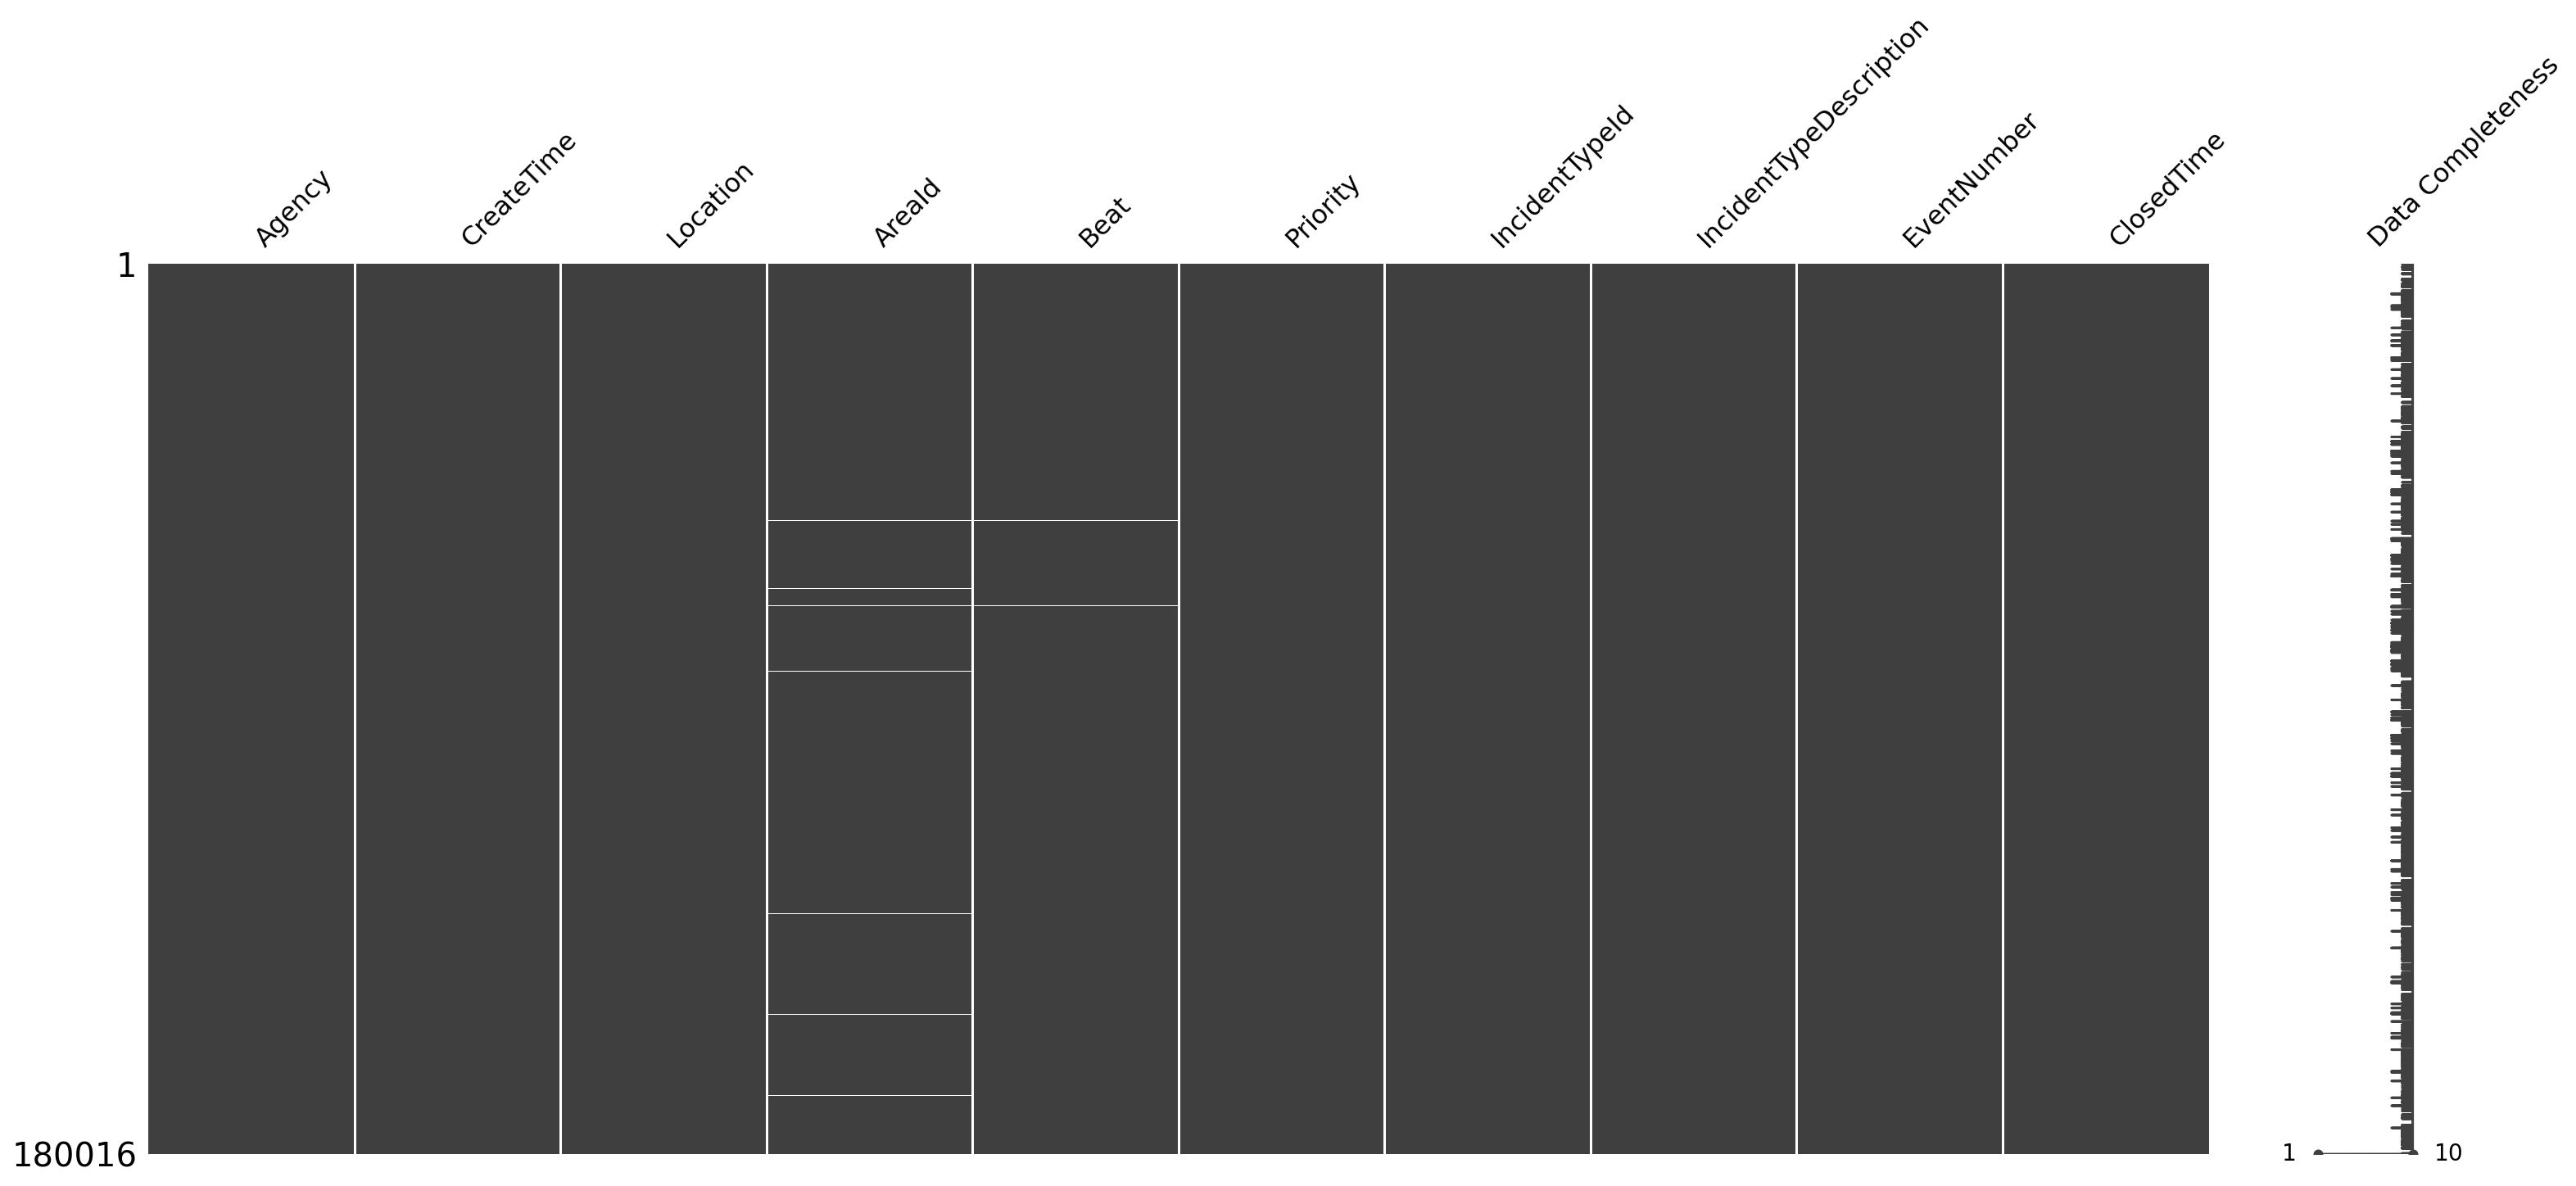

In [6]:
msno.matrix(t2011, labels=True)

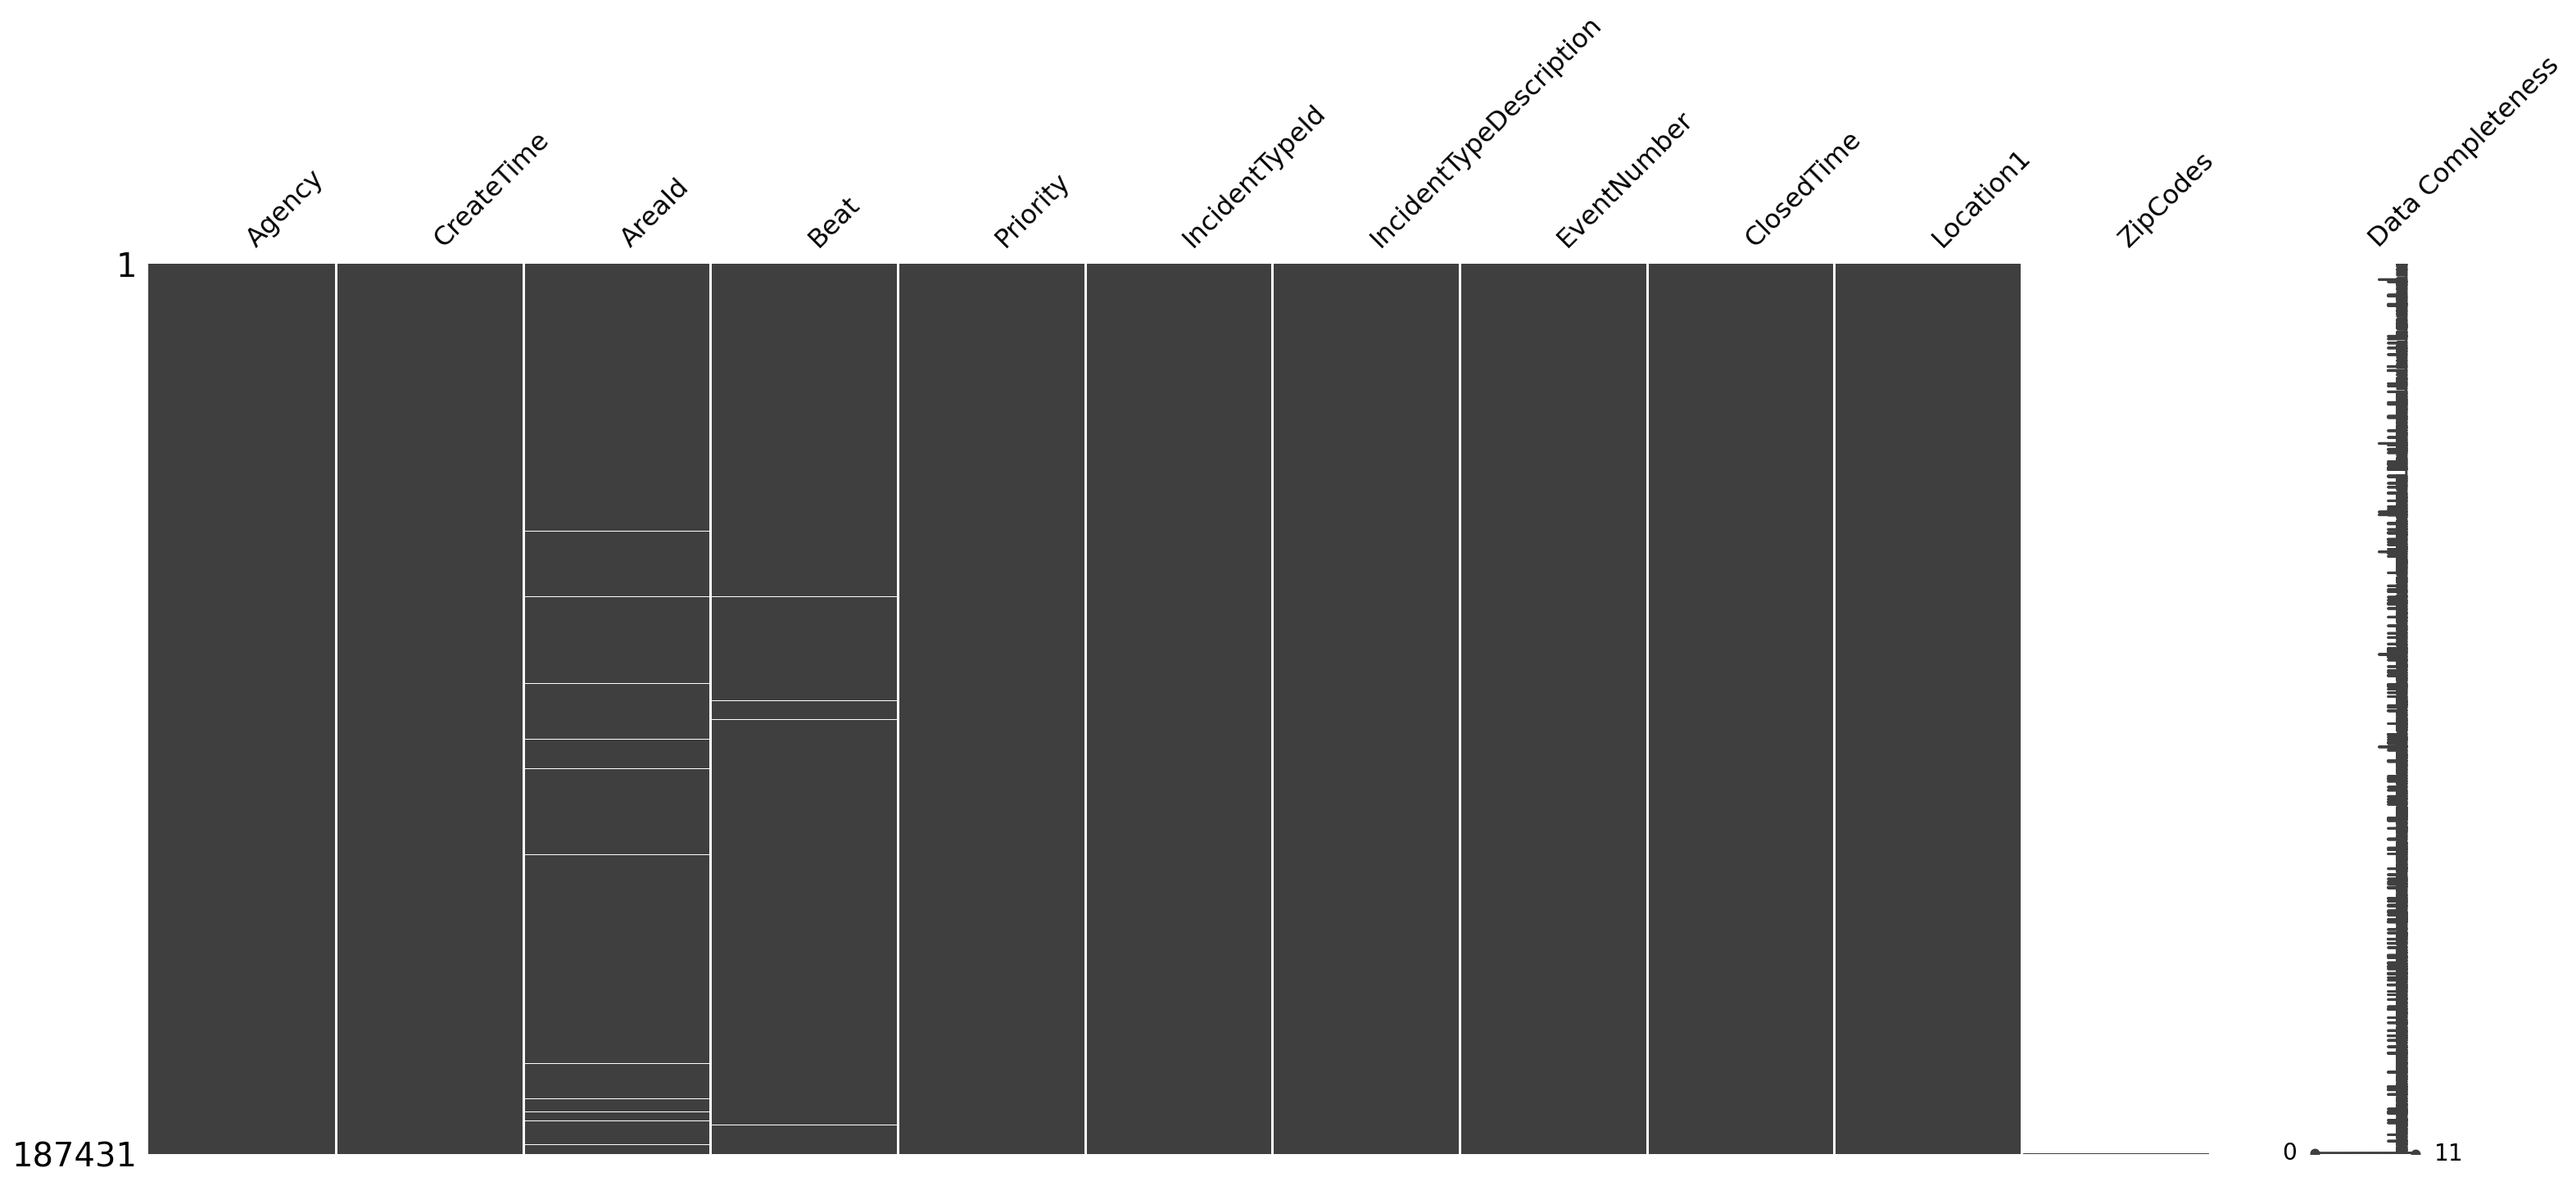

In [7]:
msno.matrix(t2012, labels=True)

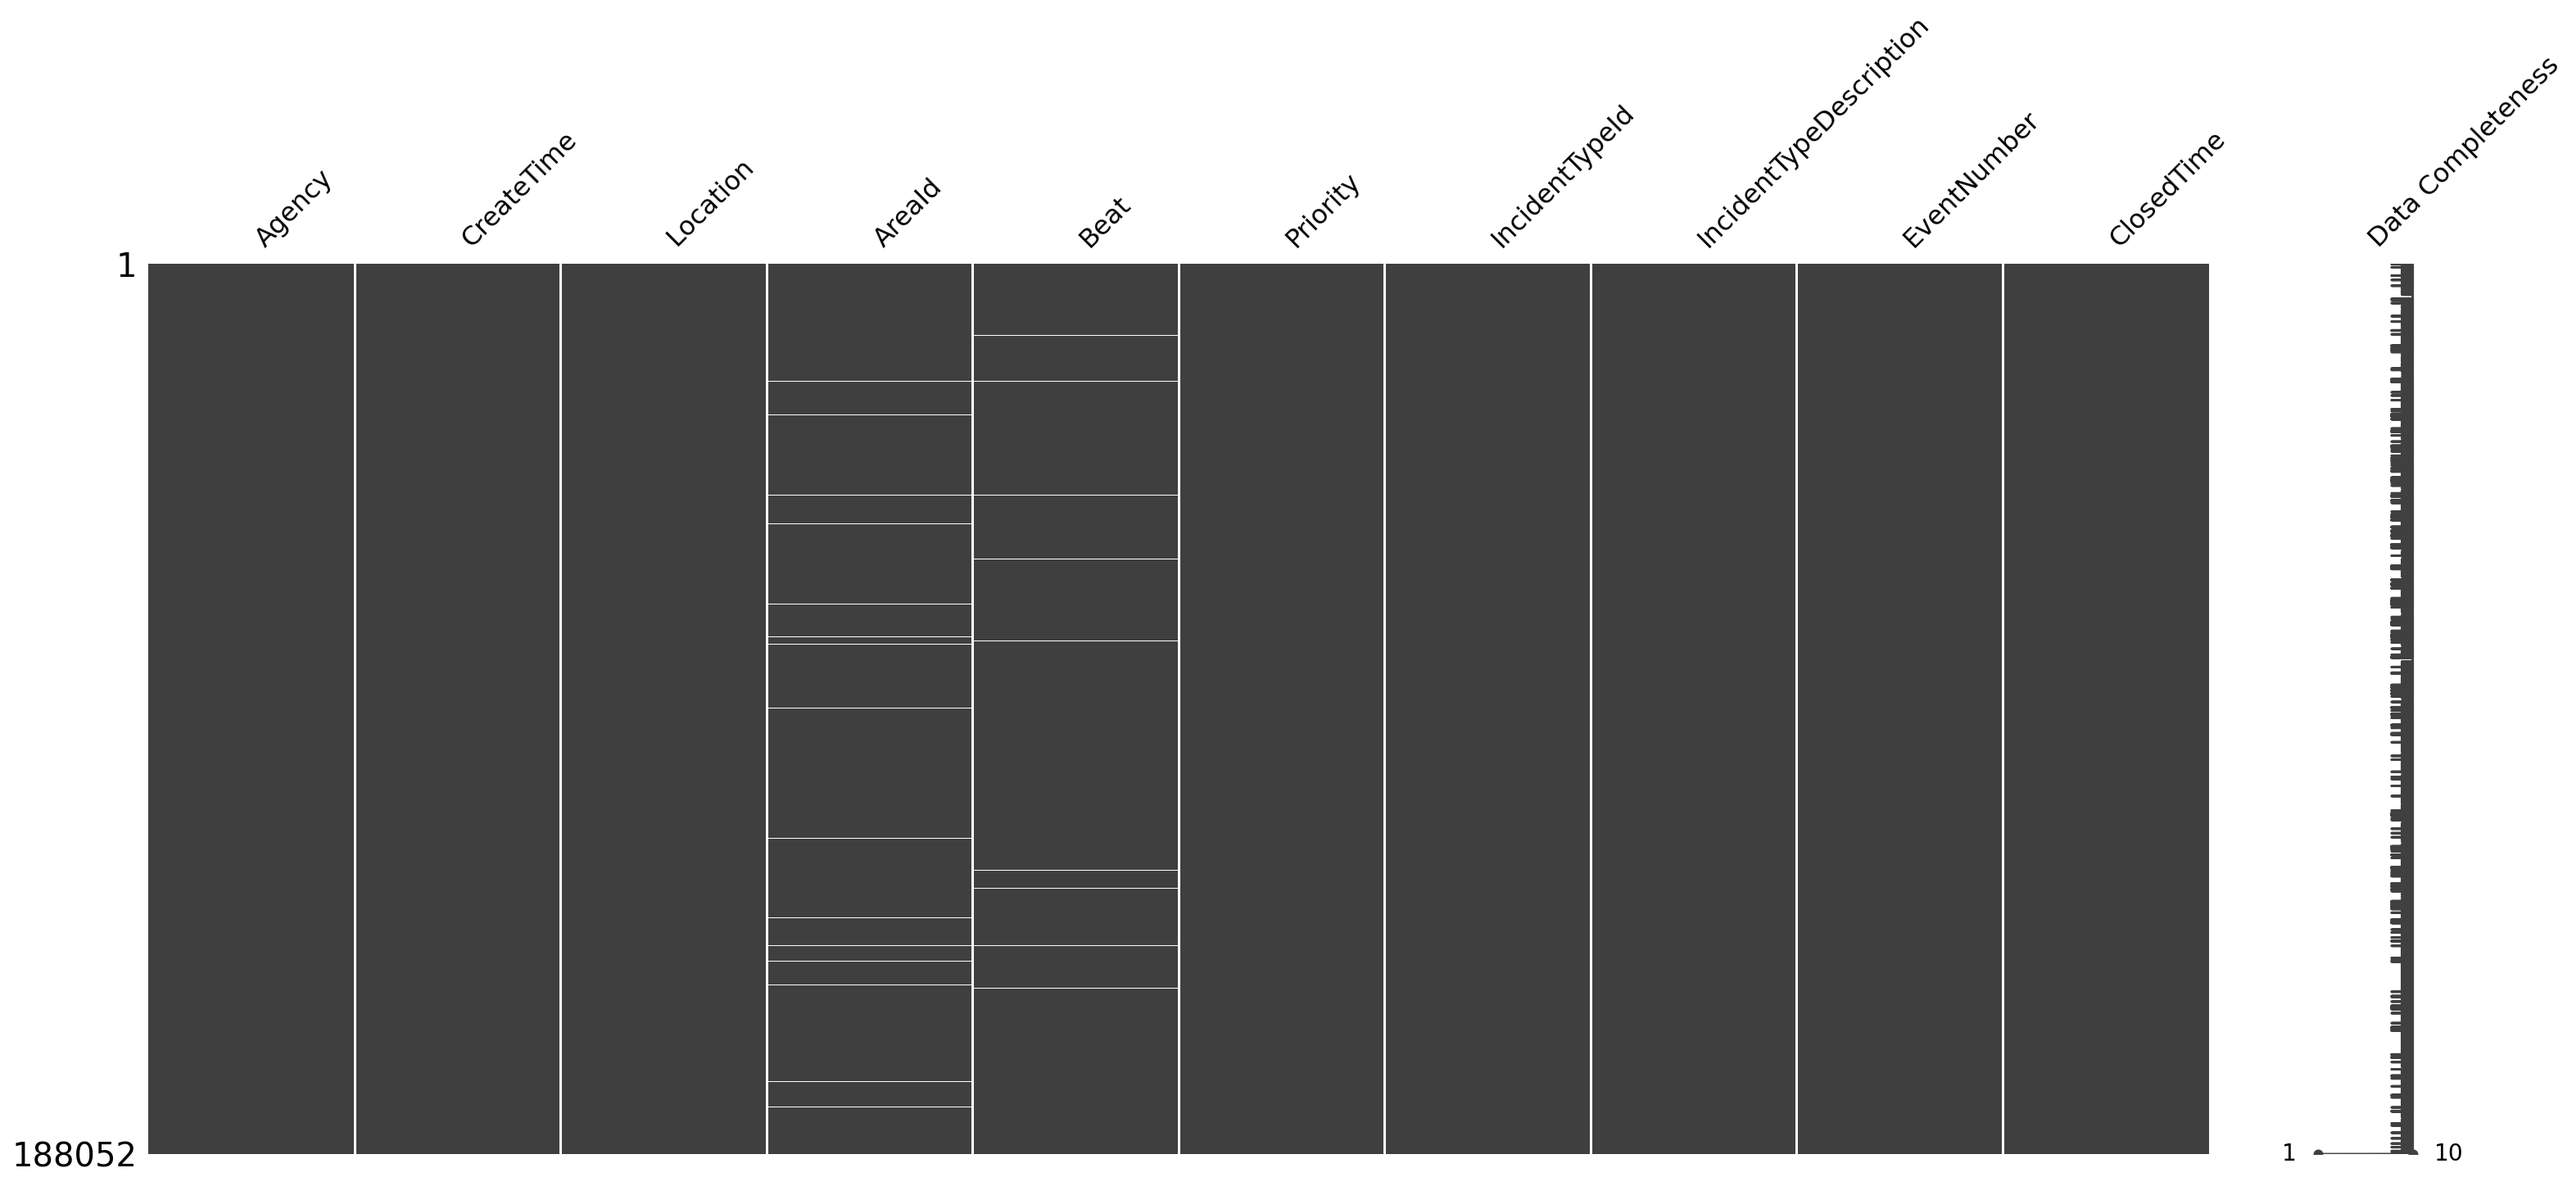

In [8]:
msno.matrix(t2013, labels=True)

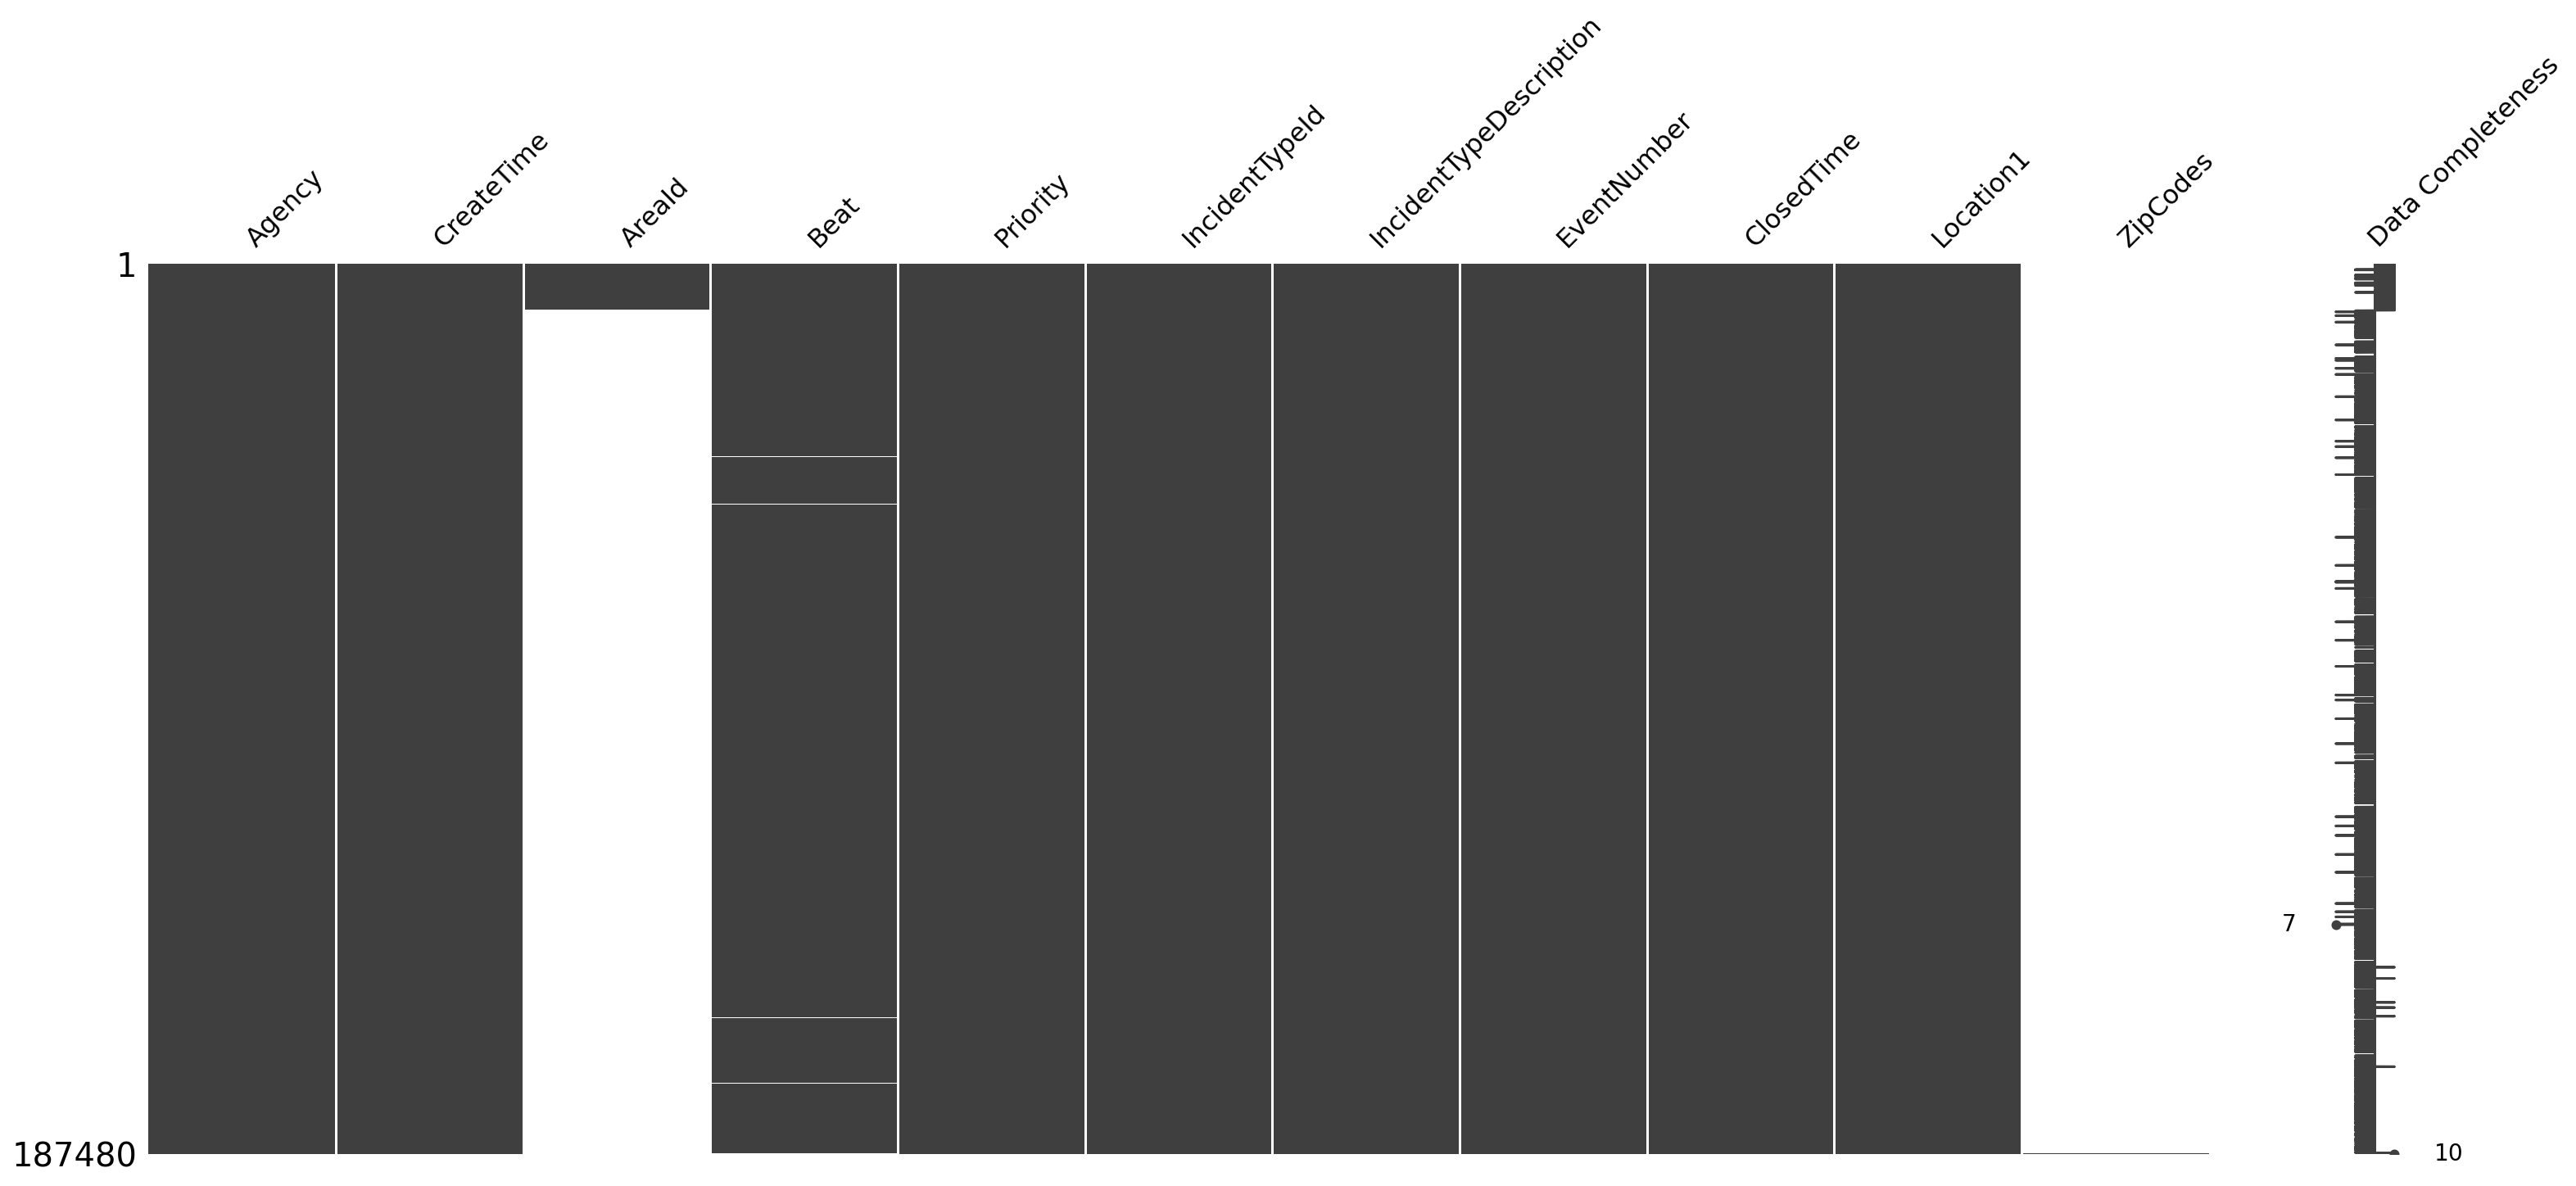

In [9]:
msno.matrix(t2014, labels=True)
#数据损失过多没有参考价值

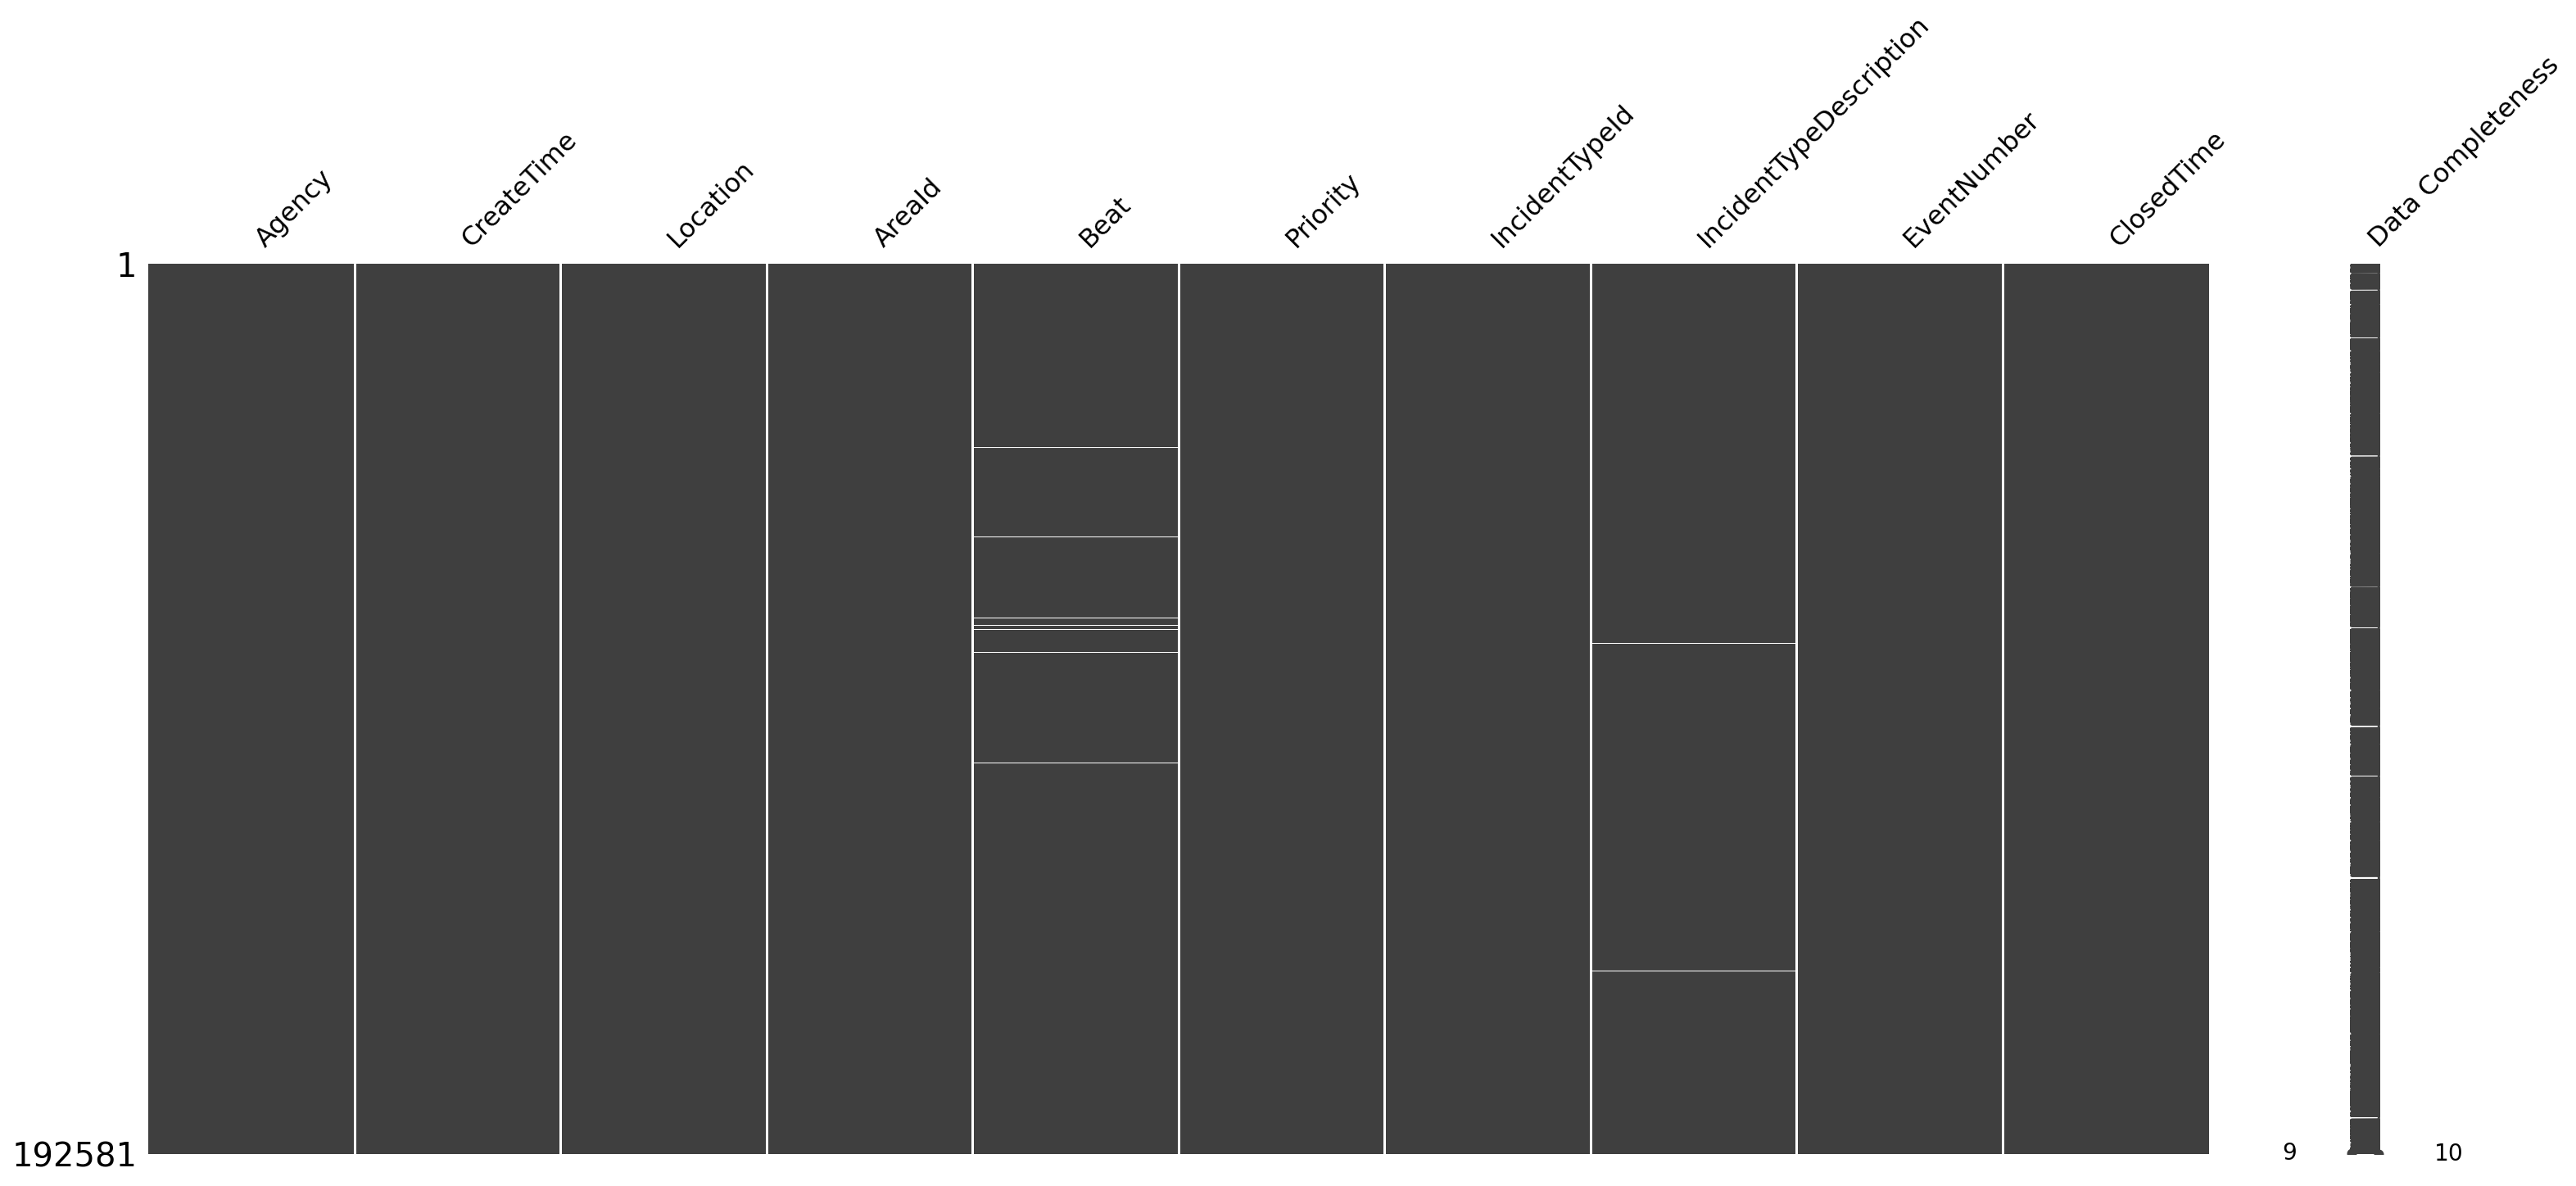

In [10]:
msno.matrix(t2015, labels=True)

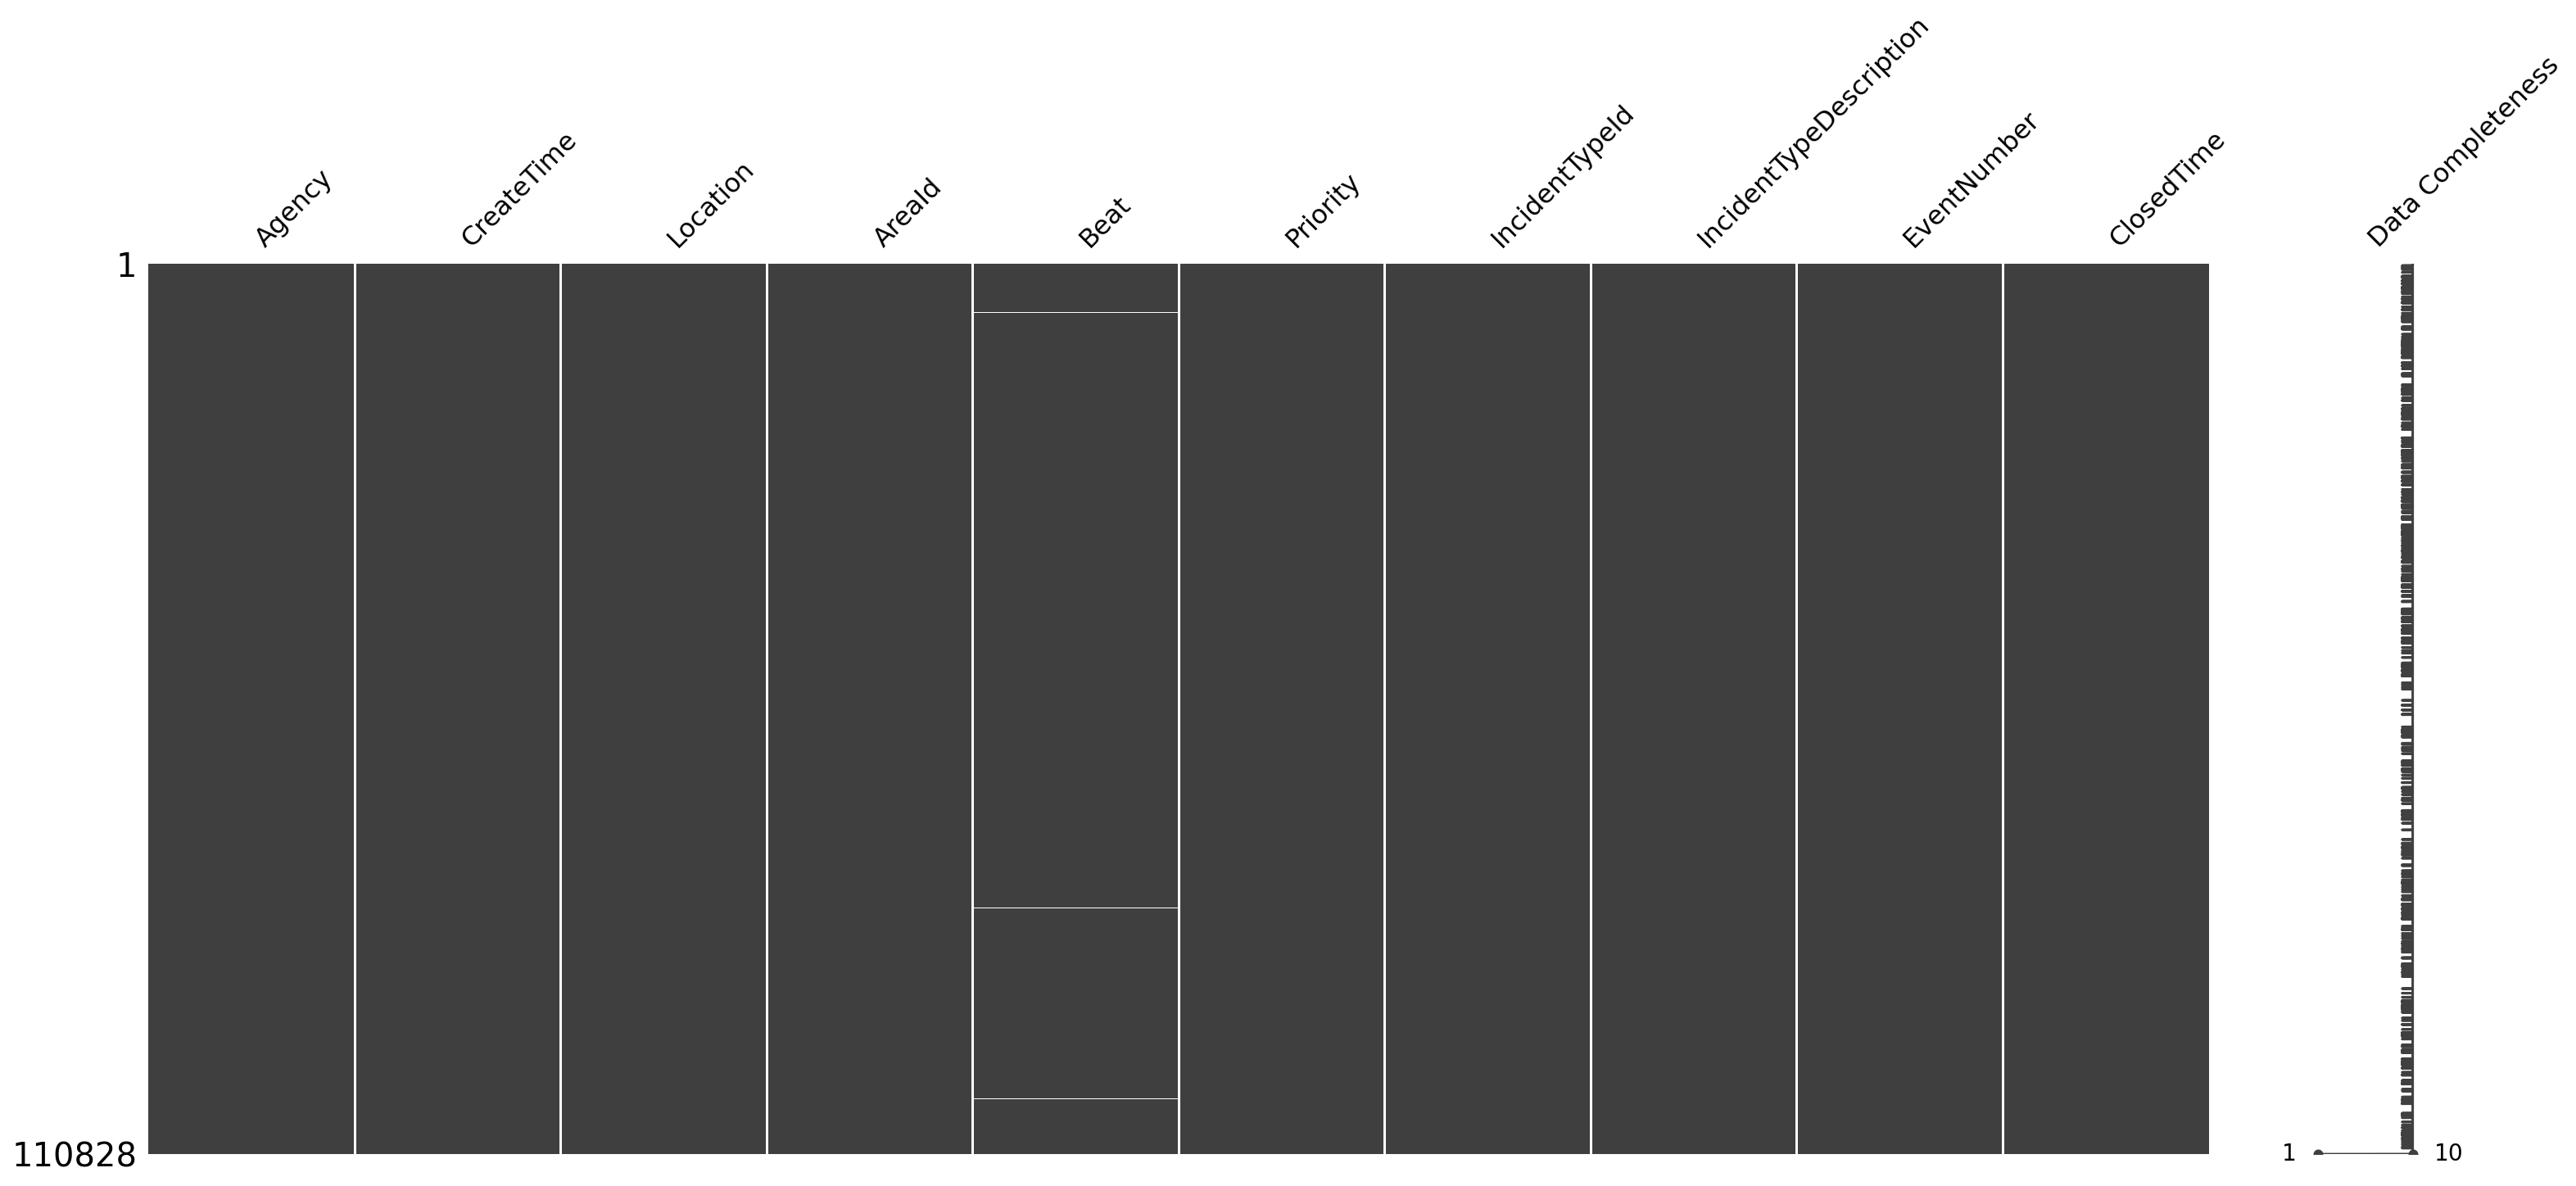

In [12]:
msno.matrix(t2016, labels=True)

In [17]:
attribute=["Agency","CreateTime","Location","AreaId","Beat","Priority","IncidentTypeId","IncidentTypeDescription","EventNumber","ClosedTime"
]
# 使用dropna()函数操作删除缺失值
s2011 = t2011.dropna()


In [ ]:

# 绘制可视化图
fig = plt.figure(figsize = (30,20))

i = 1

# 绘制直方图
for item in ["AreaId","Priority"]:
    ax = fig.add_subplot(4,7,i)
    ax.set_title(item)
    t2011[item].plot(ax = ax, alpha = 0.3, kind = 'hist', label = 'origin', legend = True)
    s2011[item].plot(ax = ax, alpha = 0.8, kind = 'hist', label = 'filtrated', legend = True)
    ax.axvline(t2011.mean(), color = 'r')
    ax.axvline(s2011.mean(), color = 'b')
    i += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
plt.show()

In [ ]:
s2012 = t2012.dropna()

# 绘制可视化图
fig = plt.figure(figsize = (30,20))

i = 1

# 绘制直方图
for item in ["AreaId","Priority"]:
    ax = fig.add_subplot(4,7,i)
    ax.set_title(item)
    t2012[item].plot(ax = ax, alpha = 0.3, kind = 'hist', label = 'origin', legend = True)
    s2012[item].plot(ax = ax, alpha = 0.8, kind = 'hist', label = 'filtrated', legend = True)
    ax.axvline(t2012.mean(), color = 'r')
    ax.axvline(s2012.mean(), color = 'b')
    i += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

In [ ]:
s2013 = t2013.dropna()

# 绘制可视化图
fig = plt.figure(figsize = (30,20))

i = 1

# 绘制直方图
for item in ["AreaId","Priority"]:
    ax = fig.add_subplot(4,7,i)
    ax.set_title(item)
    t2013[item].plot(ax = ax, alpha = 0.3, kind = 'hist', label = 'origin', legend = True)
    s2013[item].plot(ax = ax, alpha = 0.8, kind = 'hist', label = 'filtrated', legend = True)
    ax.axvline(t2013.mean(), color = 'r')
    ax.axvline(s2013.mean(), color = 'b')
    i += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

In [ ]:
#填充频率最高的词
s2012 = t2012.copy()
for item in attribute:
    # 计算出最高频率的值
    most_frequent_value = s2012[item].value_counts().idxmax()
    # 替换缺失值
    s2012[item].fillna(value = most_frequent_value, inplace = True)


In [ ]:
fig = plt.figure(figsize = (30,20))

i = 1

# 绘制直方图
for item in ["AreaId","Priority"]:
    ax = fig.add_subplot(4,7,i)
    ax.set_title(item)
    t2012[item].plot(ax = ax, alpha = 0.8, kind = 'hist', label = 'origin', legend = True)
    s2012[item].plot(ax = ax, alpha = 0.3, kind = 'hist', label = 'droped', legend = True)
    ax.axvline(t2012[item].mean(), color = 'r')
    ax.axvline(s2012[item].mean(), color = 'b')
    i += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

In [ ]:
s2013 = t2013.copy()
for item in attribute:
    # 计算出最高频率的值
    most_frequent_value = s2013[item].value_counts().idxmax()
    # 替换缺失值
    s2013[item].fillna(value = most_frequent_value, inplace = True)

In [ ]:
fig = plt.figure(figsize = (30,20))

i = 1

# 绘制直方图
for item in ["AreaId","Priority"]:
    ax = fig.add_subplot(4,7,i)
    ax.set_title(item)
    t2013[item].plot(ax = ax, alpha = 0.8, kind = 'hist', label = 'origin', legend = True)
    s2013[item].plot(ax = ax, alpha = 0.3, kind = 'hist', label = 'droped', legend = True)
    ax.axvline(t2013[item].mean(), color = 'r')
    ax.axvline(s2013[item].mean(), color = 'b')
    i += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

In [ ]:
s2011 = t2011.copy()
for item in attribute:
    # 计算出最高频率的值
    most_frequent_value = s2011[item].value_counts().idxmax()
    # 替换缺失值
    s2011[item].fillna(value = most_frequent_value, inplace = True)
    

In [ ]:
fig = plt.figure(figsize = (30,20))

i = 1

# 绘制直方图
for item in ["AreaId","Priority"]:
    ax = fig.add_subplot(4,7,i)
    ax.set_title(item)
    t2011[item].plot(ax = ax, alpha = 0.8, kind = 'hist', label = 'origin', legend = True)
    s2011[item].plot(ax = ax, alpha = 0.3, kind = 'hist', label = 'droped', legend = True)
    ax.axvline(t2011[item].mean(), color = 'r')
    ax.axvline(s2011[item].mean(), color = 'b')
    i += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

In [ ]:
#属性相关关系
s2011= t2011.copy()

#进行插值运算
for item in attribute:
    s2011[item].interpolate(inplace = True)


In [ ]:
fig = plt.figure(figsize = (30,20))

i = 1

# 绘制直方图
for item in ["AreaId","Priority"]:
    ax = fig.add_subplot(4,7,i)
    ax.set_title(item)
    t2011[item].plot(ax = ax, alpha = 0.8, kind = 'hist', label = 'origin', legend = True)
    s2011[item].plot(ax = ax, alpha = 0.3, kind = 'hist', label = 'droped', legend = True)
    ax.axvline(t2011[item].mean(), color = 'r')
    ax.axvline(s2011[item].mean(), color = 'b')
    i += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

In [ ]:
#属性相关关系
s2012= t2012.copy()

#进行插值运算
for item in attribute:
    s2012[item].interpolate(inplace = True)

In [ ]:
fig = plt.figure(figsize = (30,20))

i = 1

# 绘制直方图
for item in ["AreaId","Priority"]:
    ax = fig.add_subplot(4,7,i)
    ax.set_title(item)
    t2012[item].plot(ax = ax, alpha = 0.8, kind = 'hist', label = 'origin', legend = True)
    s2012[item].plot(ax = ax, alpha = 0.3, kind = 'hist', label = 'droped', legend = True)
    ax.axvline(t2012[item].mean(), color = 'r')
    ax.axvline(s2012[item].mean(), color = 'b')
    i += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

In [ ]:
#属性相关关系
s2013= t2013.copy()

#进行插值运算
for item in attribute:
    s2013[item].interpolate(inplace = True)

In [ ]:
fig = plt.figure(figsize = (30,20))

i = 1

# 绘制直方图
for item in ["AreaId","Priority"]:
    ax = fig.add_subplot(4,7,i)
    ax.set_title(item)
    t2013[item].plot(ax = ax, alpha = 0.8, kind = 'hist', label = 'origin', legend = True)
    s2013[item].plot(ax = ax, alpha = 0.3, kind = 'hist', label = 'droped', legend = True)
    ax.axvline(t2013[item].mean(), color = 'r')
    ax.axvline(s2013[item].mean(), color = 'b')
    i += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

In [ ]:
s2011 = t2011.copy()

# 将数值属性的缺失值替换为0
s2011[attribute] = s2011[attribute].fillna(0)

# 对数据进行正则化
s2011[attribute] =s2011[attribute].apply(lambda x : (x - np.mean(x)) / (np.max(x) - np.min(x)))

# 构造分数表
score = {}
range_length = len(s2011)
for i in range(0, range_length):
    score[i] = {}
    for j in range(0, range_length):
        score[i][j] = 0    

# 对处理后的数据进行两两对比，每两条数据条目计算差异性得分，分值越高差异性越大
for i in range(0, range_length):
    for j in range(i, range_length):
        for item in attribute:
            temp = abs(s2011.iloc[i][item] - s2011.iloc[j][item])
            score[i][j] += temp
        score[j][i] = score[i][j]


# 对有缺失值的条目，用和它相似度最高（得分最低）的数据条目中对应属性的值替换
for index in nan_list:
    best_friend = sorted(score[index].items(), key=operator.itemgetter(1), reverse = False)[1][0]
    for item in attribute:
        if pd.isnull(s2011.iloc[index][item]):
            if pd.isnull(t2011.iloc[best_friend][item]):
                s2011.ix[index, item] = t2011[item].value_counts().idxmax()
            else:
                s2011.ix[index, item] = t2011.iloc[best_friend][item]

In [ ]:
fig = plt.figure(figsize = (30,20))

i = 1

# 绘制直方图
for item in ["AreaId","Priority"]:
    ax = fig.add_subplot(4,7,i)
    ax.set_title(item)
    t2011[item].plot(ax = ax, alpha = 0.8, kind = 'hist', label = 'origin', legend = True)
    s2011[item].plot(ax = ax, alpha = 0.3, kind = 'hist', label = 'droped', legend = True)
    ax.axvline(t2011[item].mean(), color = 'r')
    ax.axvline(s2011[item].mean(), color = 'b')
    i += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

In [ ]:
s2012 = t2012.copy()

# 将数值属性的缺失值替换为0
s2012[attribute] = s2012[attribute].fillna(0)

# 对数据进行正则化
s2012[attribute] =s2012[attribute].apply(lambda x : (x - np.mean(x)) / (np.max(x) - np.min(x)))

# 构造分数表
score = {}
range_length = len(s2012)
for i in range(0, range_length):
    score[i] = {}
    for j in range(0, range_length):
        score[i][j] = 0    

# 对处理后的数据进行两两对比，每两条数据条目计算差异性得分，分值越高差异性越大
for i in range(0, range_length):
    for j in range(i, range_length):
        for item in attribute:
            temp = abs(s2012.iloc[i][item] - s2012.iloc[j][item])
            score[i][j] += temp
        score[j][i] = score[i][j]


# 对有缺失值的条目，用和它相似度最高（得分最低）的数据条目中对应属性的值替换
for index in nan_list:
    best_friend = sorted(score[index].items(), key=operator.itemgetter(1), reverse = False)[1][0]
    for item in attribute:
        if pd.isnull(s2012.iloc[index][item]):
            if pd.isnull(t2012.iloc[best_friend][item]):
                s2012.ix[index, item] = t2012[item].value_counts().idxmax()
            else:
                s2012.ix[index, item] = t2012.iloc[best_friend][item]

In [ ]:
fig = plt.figure(figsize = (30,20))

i = 1

# 绘制直方图
for item in ["AreaId","Priority"]:
    ax = fig.add_subplot(4,7,i)
    ax.set_title(item)
    t2012[item].plot(ax = ax, alpha = 0.8, kind = 'hist', label = 'origin', legend = True)
    s2012[item].plot(ax = ax, alpha = 0.3, kind = 'hist', label = 'droped', legend = True)
    ax.axvline(t2012[item].mean(), color = 'r')
    ax.axvline(s2012[item].mean(), color = 'b')
    i += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

In [ ]:
s2013 = t2013.copy()

# 将数值属性的缺失值替换为0
s2013[attribute] = s2013[attribute].fillna(0)

# 对数据进行正则化
s2013[attribute] =s2013[attribute].apply(lambda x : (x - np.mean(x)) / (np.max(x) - np.min(x)))

# 构造分数表
score = {}
range_length = len(s2013)
for i in range(0, range_length):
    score[i] = {}
    for j in range(0, range_length):
        score[i][j] = 0    

# 对处理后的数据进行两两对比，每两条数据条目计算差异性得分，分值越高差异性越大
for i in range(0, range_length):
    for j in range(i, range_length):
        for item in attribute:
            temp = abs(s2013.iloc[i][item] - s2013.iloc[j][item])
            score[i][j] += temp
        score[j][i] = score[i][j]


# 对有缺失值的条目，用和它相似度最高（得分最低）的数据条目中对应属性的值替换
for index in nan_list:
    best_friend = sorted(score[index].items(), key=operator.itemgetter(1), reverse = False)[1][0]
    for item in attribute:
        if pd.isnull(s2013.iloc[index][item]):
            if pd.isnull(t2013.iloc[best_friend][item]):
                s2013.ix[index, item] = t2013[item].value_counts().idxmax()
            else:
                s2013.ix[index, item] = t2013.iloc[best_friend][item]